In [2]:
import xarray as xr

In [4]:
nc_file = "data/gfs/gdas.t00z.sfcanl.nc"
# 3. Open as a single concatenated Dataset
ds_sfcanl = xr.open_dataset(nc_file)

In [5]:
ds_sfcanl

<xarray.Dataset> Size: 1GB
Dimensions:  (grid_xt: 3072, grid_yt: 1536, time: 1)
Coordinates:
  * grid_xt  (grid_xt) float64 25kB 0.0 0.1172 0.2344 ... 359.6 359.8 359.9
  * grid_yt  (grid_yt) float64 12kB 89.91 89.79 89.68 ... -89.68 -89.79 -89.91
  * time     (time) object 8B 2025-06-05 00:00:00
Data variables: (12/62)
    lon      (grid_yt, grid_xt) float64 38MB ...
    lat      (grid_yt, grid_xt) float64 38MB ...
    alnsf    (time, grid_yt, grid_xt) float32 19MB ...
    alnwf    (time, grid_yt, grid_xt) float32 19MB ...
    alvsf    (time, grid_yt, grid_xt) float32 19MB ...
    alvwf    (time, grid_yt, grid_xt) float32 19MB ...
    ...       ...
    xtts     (time, grid_yt, grid_xt) float32 19MB ...
    xu       (time, grid_yt, grid_xt) float32 19MB ...
    xv       (time, grid_yt, grid_xt) float32 19MB ...
    xz       (time, grid_yt, grid_xt) float32 19MB ...
    xzts     (time, grid_yt, grid_xt) float32 19MB ...
    zc       (time, grid_yt, grid_xt) float32 19MB ...
Attributes:
    nsoil:    4
    source:   FV3GFS
    grid:     gaussian
    im:       3072
    jm:       1536

In [8]:
ds_sfcanl_tprcp = ds_sfcanl['tprcp']
ds_sfcanl_tprcp

<xarray.DataArray 'tprcp' (time: 1, grid_yt: 1536, grid_xt: 3072)> Size: 19MB
[4718592 values with dtype=float32]
Coordinates:
  * grid_xt  (grid_xt) float64 25kB 0.0 0.1172 0.2344 ... 359.6 359.8 359.9
  * grid_yt  (grid_yt) float64 12kB 89.91 89.79 89.68 ... -89.68 -89.79 -89.91
  * time     (time) object 8B 2025-06-05 00:00:00
Attributes:
    long_name:     total precipitation
    units:         kg/m**2
    missing:       9.99e+20
    cell_methods:  time: point
    output_file:   sfc

In [9]:
ds_sfcanl_tprcp_masked = ds_sfcanl_tprcp.where(ds_sfcanl_tprcp != ds_sfcanl_tprcp.attrs['missing'])

In [15]:
us_tprcp = ds_sfcanl_tprcp_masked.sel(grid_xt=slice(((180-125.5)+180), ((180-64)+180)),grid_yt=slice(50.2, 22))

In [18]:
us_tprcp

<xarray.DataArray 'tprcp' (time: 1, grid_yt: 241, grid_xt: 524)> Size: 505kB
array([[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [4.1447059e-08, 1.9757297e-10, 1.9757297e-10, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [8.3036085e-08, 1.3110010e-12, 1.3110010e-12, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]]],
      shape=(1, 241, 524), dtype=float32)
Coordinates:
  * grid_xt  (grid_xt) float64 4kB 234.6 234.7 234.8 235.0 ... 295.7 295.8 295.9
  * grid_yt  (grid_yt) float64 2kB 50.2 50.08 49.96 49.85 ... 22.32 22.2 22.08
  * time     (time) object 8B 2025-06-05 00:00:00
Attributes:
    long_name:     total precipitation
    units:         kg/m**2
    missing:       9.99e+20
    cell_methods:  time: point
    output_file:   sfc

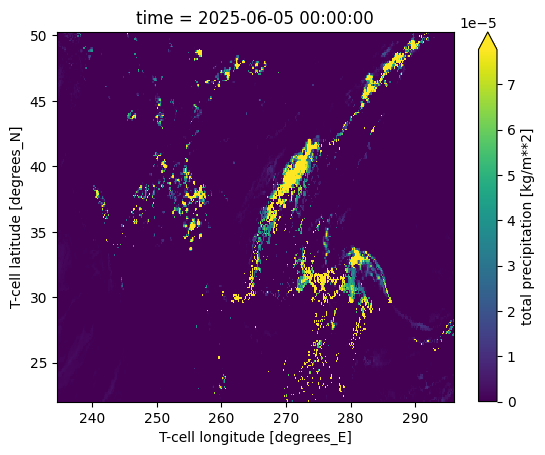

In [21]:
us_tprcp.plot(robust=True) #Robust looks at figures between 2-98 percentile